<a href="https://colab.research.google.com/github/anant-infinity/DAXSS_Data_Analysis/blob/master/SPHERE_2022_Anant/daxss_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DAXSS Data Analysis and Spectral Fitting with Python (PyXSPEC)**

> Anant Kumar T K, Email: anant.telikicherla@ualberta.ca


Hello! This tutorial is created for the [Solar Physics High Energy Research (SPHERE) 2022 Workshop](https://sphere.boulder.swri.edu/) and gives an overview of DAXSS Data Plotting and Spectral Analysis using Python. 

The Dual Aperture X-Ray Solar Spectrometer (DAXSS) is on-board the [INSPIRESat-1 satellite](https://lasp.colorado.edu/home/inspire/), launched on 14th February 2022 and is currently functioning well [in-orbit](https://dashboard.satnogs.org/d/xSIFnkB7k/inspiresat-1?orgId=1). DAXSS has its heritage from the X123 SDD based instrument, which flew on the [MinXSS-1 and MinXSS-2 CubeSats](https://lasp.colorado.edu/home/minxss/).



# **Tutorial Overview**

This tutorial presents two ways of Analysing DAXSS Data:

1.   Using this Google Collab Notebook (which can be run directly in your browser)
2.   Using a Graphical User Interface (GUI) based Python utility (requires python dependency installation in your local machine). Can be downloaded: [here](https://). 

In both cases the slide below lists the inputs required for analysing data as well as the outputs that we shall generate in this tutorial:

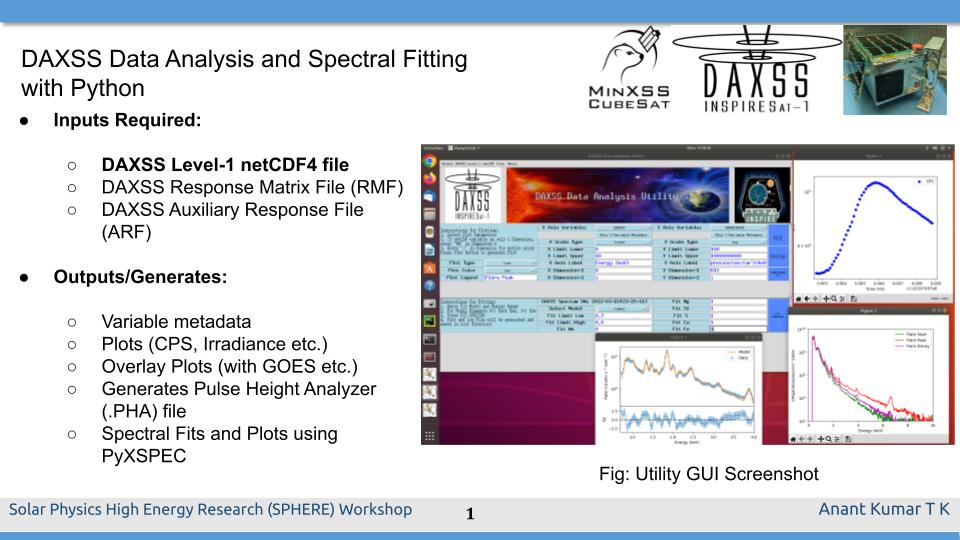

Listed below are links to input files/dependencies that are required to run the GUI utility and for spectral fitting:

*  [DAXSS Level-1 netCDF4 File](https://www.dropbox.com/sh/0r40mfsphwgjghb/AADt9BFqcRf_vkunjNKf6Rjja/data/fm3/level1/daxss_solarSXR_level1_2022-02-14-mission_v2.0.0.ncdf?dl=0) 
*  [ARF and RMF Files](https://www.dropbox.com/sh/0r40mfsphwgjghb/AABqvbqJzltVZrYJve-rrlava/data/calibration/mithun_versions_daxss?dl=0&lst=)
*  [XSPEC and PyXSPEC HEASoft Download](https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/buildinstall.html)


Given below is an overview of the various code snippets provided:


*   **Code Snippet 1:** Downloads the DAXSS level-1 netCDF file from the MinXSS Dropbox
*   **Code Snippet 2:** Installs and Imports all Python Pre-requisite packages
*   **Code Snippet 3:** Loads the Level-1 file and displays metadata of ***all*** Level-1 variables
*   **Code Snippet 4:** Displays metadata of ***a selected*** Level-1 variables
*   **Code Snippet 5:** Example 1: Plotting 1-D variables. This code can be used to plot any 1-D variables in the Level-1 file. The user can set plot parameters in this snippet, and the *plot can be generated using code snippet 7*.
*   **Code Snippet 6:** Example 2: Plotting 2-D variables. This code can be used to plot any 2-D variables in the Level-1 file. The user can set plot parameters in this snippet, and the *plot can be generated using code snippet 7*.
*   **Code Snippet 7:** This code generates the plot as defined by the user in Code Snippets 5 and 6. By default, the user need not make any changes to this snippet. 
*   **Code Snippet 8:** Downloads GOES data using SunPy
*   **Code Snippet 9:** Creates an overlay plot with DAXSS and GOES data. 
*   **Code Snippet 10:** Generates the Pulse Height Analyzer (.PHA) according to the [FITS File formats](https://heasarc.gsfc.nasa.gov/docs/heasarc/ofwg/docs/spectra/ogip_92_007.pdf) can be used for spectral fitting using PyXSPEC. 
*   **Code Snippet 11:** Performs a spectral fit of the DAXSS Energy Spectrum using vvapec model in PyXSPEC. This snippet cannot directly run in the Google collab since it involves installation of HEASoft (XSPEC, PyXSPEC). 

# **Code Snippet 1**

In [ ]:
#Downloading the Level-1 DAXSS file into the google collab notebook
!wget -O daxss_solarSXR_level1_2022-02-14-mission_v2.0.0.ncdf -cq https://www.dropbox.com/sh/0r40mfsphwgjghb/AADt9BFqcRf_vkunjNKf6Rjja/data/fm3/level1/daxss_solarSXR_level1_2022-02-14-mission_v2.0.0.ncdf?dl=0

# **Code Snippet 2**

In [ ]:
#Installing dependencies
!pip install matplotlib netCDF4 astropy datetime numpy xarray zeep drms sunpy 

# Importing all required Python Libraries
import matplotlib.pyplot as plt
import netCDF4 as nc
from astropy.io import fits
from matplotlib.dates import date2num, DateFormatter
from dateutil import parser
from datetime import datetime, timedelta
import numpy as np
import xarray
from sunpy.net import Fido, attrs as a

# **Code Snippet 3**

In [ ]:
#Loading the level-1 file
daxss_level1_file_path = '/content/daxss_solarSXR_level1_2022-02-14-mission_v2.0.0.ncdf'
daxsslevel1 = nc.Dataset(daxss_level1_file_path)

#Print a List of all netCDF4 Variable
level_1_var_list = list(daxsslevel1.variables)

var_array = []
for var in daxsslevel1.variables.values():
  var_array.append(var)
print(var_array)

# **Code Snippet 4**

In [ ]:
#Print Metadata of a particular variable
chosen_variable = 'X123_SLOW_CORRECTED' #Change this according to your chosen variable

for i in range(0, len(var_array)):
  if(var_array[i].name == chosen_variable):
    print(var_array[i])

# **Code Snippet 5**

In [ ]:
#Example 1: Plotting 1-Dimension Variables
plot_variable_x = 'TIME_YD'
num_of_dimensions_x = 1 #1 => 1 dimension, 2 => 2 dimensions
dimension_2_value_x = 0 #For 1-D variables let this be 0
x_lim_low = 2022060.0
x_lim_upper = 2022120.0
x_scale = 'linear'
x_label = 'Time in Year-Day Format'

#Selecting the x-variable parameters
plot_variable_y = 'X123_SLOW_CORRECTED'
num_of_dimensions_y = 1 #1 => 1 dimension, 2 => 2 dimensions
dimension_2_value_y = 0 #For 1-D variables let this be 0
y_lim_low = 100
y_lim_upper = 1000000
y_scale = 'log'
y_label = 'Count Per Second (CPS)'

#Selecting the Plot Color
plot_color_selected = 'red'

#Select Plot Type: line or scatter
plot_type = 'scatter'

#Select Plot Legend 
plot_legend = 'CPS'

#Enter Plot Title
plot_title = 'DAXSS Mission CPS vs Time'

# **Code Snippet 6**

In [ ]:
#Example 2: Plotting 2 Dimension Variables
plt.rcParams['figure.figsize'] = [20, 10]
plot_variable_x = 'ENERGY'
num_of_dimensions_x = 2 #1 => 1 dimension, 2 => 2 dimensions
dimension_2_value_x = 0 #Set this to the appropriate index
x_lim_low = 0
x_lim_upper = 30
x_scale = 'linear'
x_label = 'Energy (keV)'

#Selecting the x-variable parameters
plot_variable_y = 'IRRADIANCE'
num_of_dimensions_y = 2 #1 => 1 dimension, 2 => 2 dimensions
dimension_2_value_y = 582 #Set this to the appropriate index
y_lim_low = 100
y_lim_upper = 10000000000
y_scale = 'log'
y_label = 'Irradiance'

#Selecting the Plot Color
plot_color_selected = 'red'

#Select Plot Type: line or scatter
plot_type = 'line'

#Select Plot Legend 
plot_legend = 'Irradiance'

#Enter Plot Title
plot_title = 'Irradiance vs Energy'



# **Code Snippet 7**

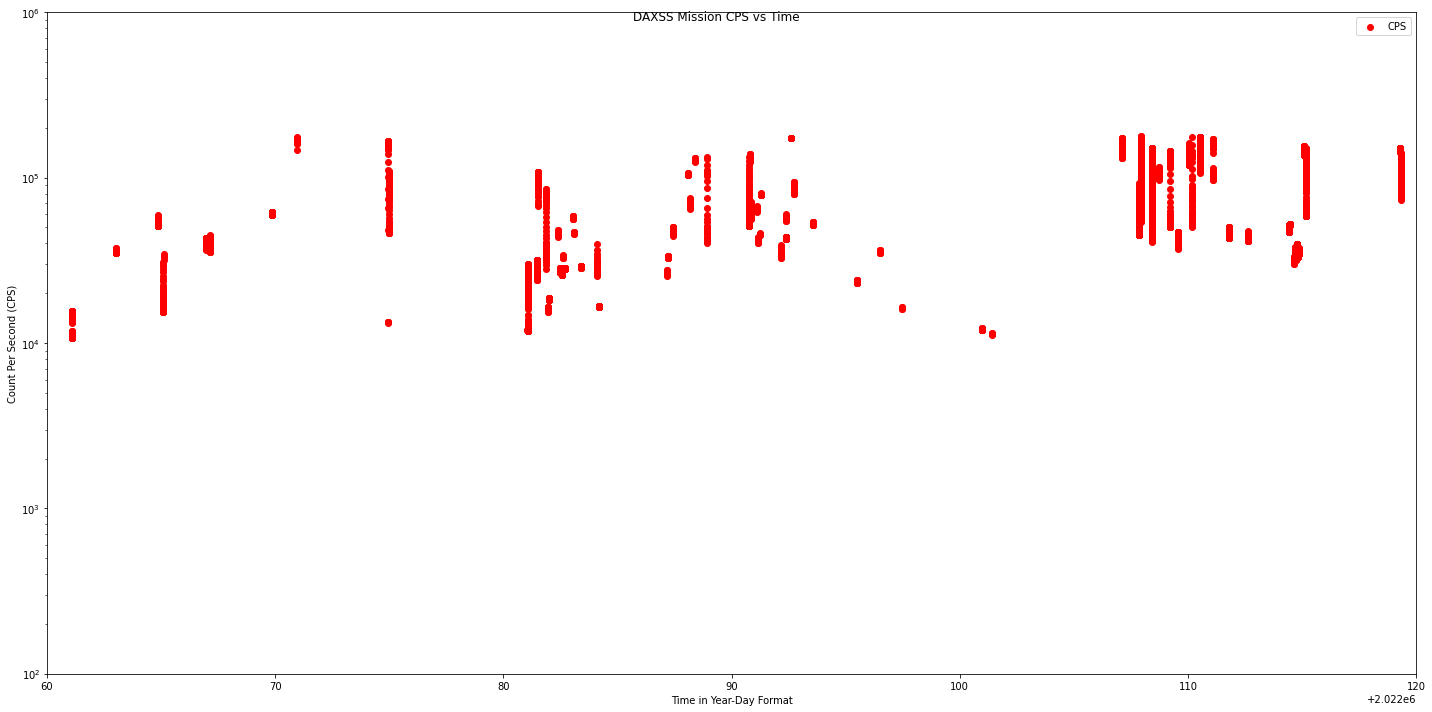

In [ ]:
#Generate the Plot
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()

plt.xlim([float(x_lim_low), float(x_lim_upper)])
plt.xscale(str(x_scale))
plt.xlabel(str(x_label))

plt.ylim([float(y_lim_low), float(y_lim_upper)])
plt.yscale(str(y_scale))
plt.ylabel(str(y_label))
plt.suptitle(plot_title)

if (num_of_dimensions_x == 1):
  x_plot = daxsslevel1[plot_variable_x][:]
elif (num_of_dimensions_x ==2):
  x_plot = daxsslevel1[plot_variable_x][dimension_2_value_x, :]

if (num_of_dimensions_y == 1):
  y_plot = daxsslevel1[plot_variable_y][:]
elif (num_of_dimensions_y ==2):
  y_plot = daxsslevel1[plot_variable_y][dimension_2_value_y, :]

color_code_array = [['black','k'], ['blue','b'],['red','r'],['green','g'],['yellow','y'],['cyan','c'],['magenta','m']]
for i in range(len(color_code_array)):
  if(color_code_array[i][0] == plot_color_selected):
    chosen_plot_color = color_code_array[i][1]
    break

if(plot_type=="line"):
  plt.plot(x_plot, y_plot, color=chosen_plot_color, label=str(plot_legend))
elif (plot_type == "scatter"):
  scatter = plt.scatter(x_plot, y_plot, color=chosen_plot_color, label=str(plot_legend))

plt.legend()
plt.show()
plt.close()


# **Code Snippet 8**

In [ ]:
#Downloading GOES Data using SunPy
#Searching
results = Fido.search(a.Time("2022-03-15 00:00", "2022-03-15 23:59"), a.Instrument("XRS"), a.goes.SatelliteNumber(16))
downloaded_files = Fido.fetch(results, path='/content/{file}')

# **Code Snippet 9**

<Figure size 1440x720 with 0 Axes>

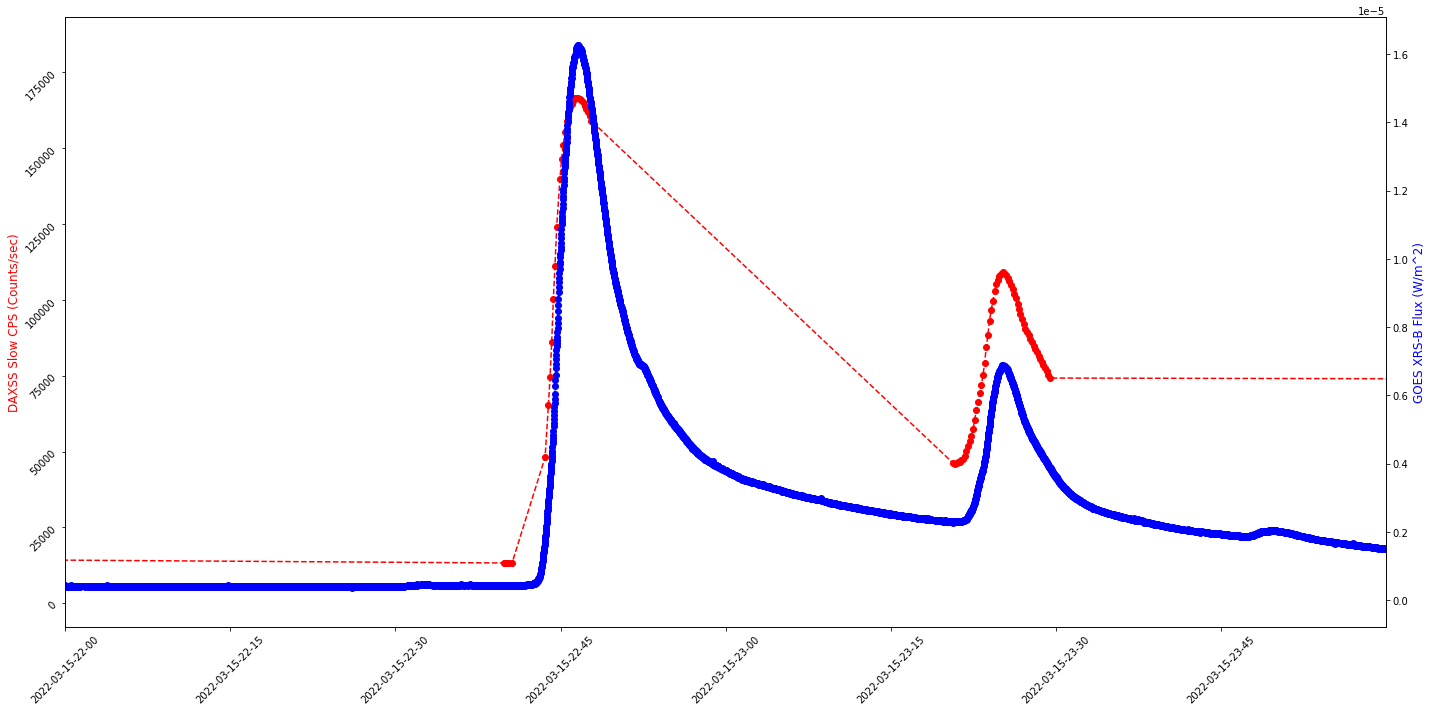

In [ ]:
#Generating a overlay plot with GOES Data
# Path to Level-1 File
goes_file_path = '/content/sci_xrsf-l2-flx1s_g16_d20220315_v2-1-0.nc'
# Import File as a netCDF Dataset
goes_data = nc.Dataset(goes_file_path)

time_ISO = daxsslevel1['TIME_ISO'][:]
daxss_datetime_obj_array = []
for time_index in range(len(time_ISO)):
  time_ISO_String = []
  for var_index in range(0, 20):
    time_str = time_ISO[time_index][var_index].decode("utf-8")
    time_ISO_String.append(time_str)
  daxss_datetime_obj_array.append(parser.parse(''.join(time_ISO_String)))

daxss_time = date2num(daxss_datetime_obj_array)
daxss_x123_slow_cps = daxsslevel1['X123_SLOW_CORRECTED'][:]

goes_time_array = goes_data['time'][:]
base_date = datetime(2000, 1, 1, 12, 0, 0)
goes_datetime_obj_array = []

for i in range(len(goes_time_array)):
  curr_time = base_date + timedelta(seconds=int(goes_time_array[i]))
  goes_datetime_obj_array.append(curr_time)

goes_time = date2num(goes_datetime_obj_array)
goes_flux_data = goes_data['xrsb_flux'][:]

plt.figure()
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()

ax1.plot_date(daxss_time, daxss_x123_slow_cps, 'o--', color='red', label="DAXSS Slow Counts")
ax1.set_ylabel("DAXSS Slow CPS (Counts/sec)", color="red", fontsize=12)
ax2 = ax1.twinx()
ax2.plot_date(goes_time, goes_flux_data, 'o:', color='blue', label="GOES XRS-B Flux")
ax2.set_ylabel("GOES XRS-B Flux (W/m^2)", color="blue", fontsize=12)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d-%H-%M'))
ax1.tick_params(rotation=45)
plt.xlim([goes_time[-7200], goes_time[-1]])
plt.show()
plt.close()

# **Code Snippet 10**

In [ ]:
# Creating the FITS PHA File 
spectrum_index = 582 #Change to chosen spectrum

# Primary HDU - Header
hdr_dummy = fits.Header()
hdr_data = fits.Header()
hdr_dummy['MISSION'] = "InspireSat-1"
hdr_dummy['TELESCOP'] = "InspireSat-1"
hdr_dummy['INSTRUME'] = "DAXSS"
hdr_dummy['ORIGIN'] = "LASP"
hdr_dummy['CREATOR'] = "DAXSSPlotterUtility_v1"
hdr_dummy['CONTENT'] = "Type-I PHA file"

#Data Header
hdr_data['MISSION'] = "InspireSat-1"
hdr_data['TELESCOP'] = "InspireSat-1"
hdr_data['INSTRUME'] = "DAXSS"
hdr_data['ORIGIN'] = "LASP"
hdr_data['CREATOR'] = "DAXSSPlotterUtility_v1"
hdr_data['CONTENT'] = "SPECTRUM"
hdr_data['HDUCLASS'] = "OGIP"
hdr_data['LONGSTRN'] = "OGIP 1.0"
hdr_data['HDUCLAS1'] = "SPECTRUM"
hdr_data['HDUVERS1'] = "1.2.1"
hdr_data['HDUVERS'] = "1.2.1"

hdr_data['AREASCAL'] = "1"
hdr_data['BACKSCAL'] = "1"
hdr_data['CORRSCAL'] = "1"
hdr_data['BACKFILE'] = "none"

hdr_data['RESPFILE'] = "FITS_Files/minxss_fm3_RMF.fits"
hdr_data['ANCRFILE'] = "FITS_Files/minxss_fm3_ARF.fits"

hdr_data['CHANTYPE'] = "PHA"
hdr_data['POISSERR'] = "F"

hdr_data['CORRFILE'] = "none"
hdr_data['EXTNAME']  = 'SPECTRUM'
hdr_data['FILTER']   = "Be/Kapton"
hdr_data['EXPOSURE'] = "9"
hdr_data['DETCHANS'] = "1000"
hdr_data['GROUPING'] = "0"

channel_number_array = []
#quality_array = []
systematic_error_array = []
for i in range(1,1001,1):
  channel_number_array.append(np.int32(i))
  #quality_array.append(np.int16(1) - np.int16(daxsslevel1['VALID_FLAG'][y_dim_1.get(),i+5]))
  systematic_error_array.append(np.float32(daxsslevel1['SPECTRUM_CPS_ACCURACY'][spectrum_index, i+5]/daxsslevel1['SPECTRUM_CPS'][spectrum_index,i+5]))

c1 = channel_number_array
c2 = daxsslevel1['SPECTRUM_CPS'][spectrum_index,6:1006]
c3 = daxsslevel1['SPECTRUM_CPS_PRECISION'][spectrum_index, 6:1006] # Precision = Statitical Error
c4 = systematic_error_array  # Accuracy = Systematic Error
#c5 = quality_array

# Creating and Storing the FITS File
time_ISO_String = []
for var_index in range(0, 20):
  time_str = daxsslevel1['TIME_ISO'][int(spectrum_index)][var_index].decode("utf-8")
  time_ISO_String.append(time_str)

hdr_dummy['FILENAME'] = 'minxss_fm3_PHA_'+''.join(time_ISO_String).replace(':', '-')+'.pha'
hdr_dummy['DATE'] = ''.join(time_ISO_String).replace(':', '-')

hdr_data['FILENAME'] = hdr_dummy['FILENAME']
hdr_data['DATE'] =  hdr_dummy['DATE']

# Data
hdu_data = fits.BinTableHDU.from_columns(
            [fits.Column(name='CHANNEL', format='J', array=c1),
             fits.Column(name='RATE', format='E', array=c2),
             fits.Column(name='STAT_ERR', format='E', array=c3),
             fits.Column(name='SYS_ERR', format='E', array=c4)],header=hdr_data)
             #fits.Column(name='QUALITY', format='J', array=c5)],
dummy_primary = fits.PrimaryHDU(header=hdr_dummy)
hdul = fits.HDUList([dummy_primary, hdu_data])

filename_fits = '/content/minxss_fm3_PHA_'+''.join(time_ISO_String).replace(':', '-')+'.pha'
hdul.writeto(filename_fits, overwrite=True)

# **Code Snippet 11**
This code cannot run directly in google collab, since it requires HEASoft (XSPEC, PyXSPEC) to be installed first. For installing HEASoft visit: https://heasarc.gsfc.nasa.gov/lheasoft/install.html

In [ ]:
#Model Fitting XSPEC
from xspec import *

#Defining a function of Fiting Energy Spectrum
def fitModel(filename, selected_model, e_low, e_high, useNe, useMg, useSi, useS, useCa, useFe):
    # Clearing Old Data + Models
    print('**-' + e_low + ' ' + e_high + '-**')
    AllData.clear()
    AllModels.clear()

    # Setting Feldman Abundances
    Xset.abund = 'file FITS_Files/feld_extd'
    logFile = Xset.openLog("Log_Files/"+filename[-39:-4]+"_Log.txt")
    #Xset.chatter = 5
    #Xset.show()
    # Loading the DAXSS spectrum
    spec = Spectrum(filename)

    spec.ignore('**-'+e_low+' '+e_high+'-**')

    # define the model
    m1 = Model(selected_model)
    # Free some parameters that are frozen (Mg, Si, and S)

    m1.vvapec.Ne.frozen = 1 - useNe
    m1.vvapec.Mg.frozen = 1 - useMg
    m1.vvapec.Si.frozen = 1 - useSi
    m1.vvapec.S.frozen = 1 - useS
    m1.vvapec.Ca.frozen= 1 - useCa
    m1.vvapec.Fe.frozen = 1 - useFe

    # do the fit
    Fit.nIterations = 100
    Fit.perform()
    # plot data, model and del-chi
    # Plot.device = '/xw'
    Plot.xAxis = 'keV'
    Plot('ld', 'delc')
    ene = Plot.x(plotGroup=1, plotWindow=1)
    eneErr = Plot.xErr(plotGroup=1, plotWindow=1)
    spec = Plot.y(plotGroup=1, plotWindow=1)
    specErr = Plot.yErr(plotGroup=1, plotWindow=1)

    fitmodel = Plot.model(plotGroup=1, plotWindow=1)

    delchi = Plot.y(plotGroup=1, plotWindow=2)
    delchiErr = Plot.yErr(plotGroup=1, plotWindow=2)

    fig0 = plt.figure(num=None, figsize=(6, 4), facecolor='w', edgecolor='k')

    ax0 = fig0.add_axes([0.15, 0.4, 0.8, 0.55])
    ax0.xaxis.set_visible(False)
    plt.errorbar(ene, spec, xerr=eneErr, yerr=specErr, fmt='.', ms=0.5, capsize=1.0, lw=0.8, label='Data')
    plt.step(ene, fitmodel, where='mid', label='Model')
    plt.yscale("log")
    #plt.xscale("log")
    plt.xlim([float(e_low), float(e_high)])
    # plt.ylim([1, 1e6])
    plt.legend()
    plt.ylabel('Rate (counts s$^{-1}$ keV$^{-1}$)')

    ax1 = fig0.add_axes([0.15, 0.15, 0.8, 0.25])
    plt.axhline(0, linestyle='dashed', color='black')
    plt.errorbar(ene, delchi, xerr=eneErr, yerr=delchiErr, fmt='.', ms=0.1, capsize=1.0, lw=0.8)
    plt.xlim([float(e_low), float(e_high)])
    plt.ylabel('$\Delta \chi$')
    plt.xlabel('Energy (keV)')
    #plt.xscale("log")
    plt.savefig('Plot_Files/V2_0_0/'+ filename[-39:-4] + "_Fit_Plot.png")
    plt.show()
    plt.close()

#Defining parameters for fitting
fit_model = 'vvapec'
e_lim_low = 0.4
e_lim_high = 4.0
useNe = 1 
useMg = 1
useSi = 1
useS = 1
useCa = 1
useFe = 1

#Calling the model fit function
fitModel(filename_fits, str(fit_model.get()), 
                        str(e_lim_low), 
                        str(e_lim_high),
                        useNe,
                        useMg,
                        useSi,
                        useS,
                        useCa,
                        useFe)
